In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Telco_customer_churn_adapted_v2.xlsx  


## 1. Import Liraries and Extract Data

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')

In [8]:
df.head(5)

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


## 2. Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [7]:
df.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,107.043246,-6.404184,5720.384481
std,2033.283305,24.559481,39.117061,0.358316,0.322898,1537.974298
min,0.000000,0.000000,23.725000,106.816666,-6.914744,2603.900000
25%,1760.500000,9.000000,46.150000,106.816666,-6.914744,4509.700000
50%,3521.000000,29.000000,91.455000,106.816666,-6.200000,5885.100000
75%,5281.500000,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,7042.000000,72.000000,154.375000,107.609810,-6.200000,8450.000000


In [9]:
def plot_numeric_distribution(data, column, ax):
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

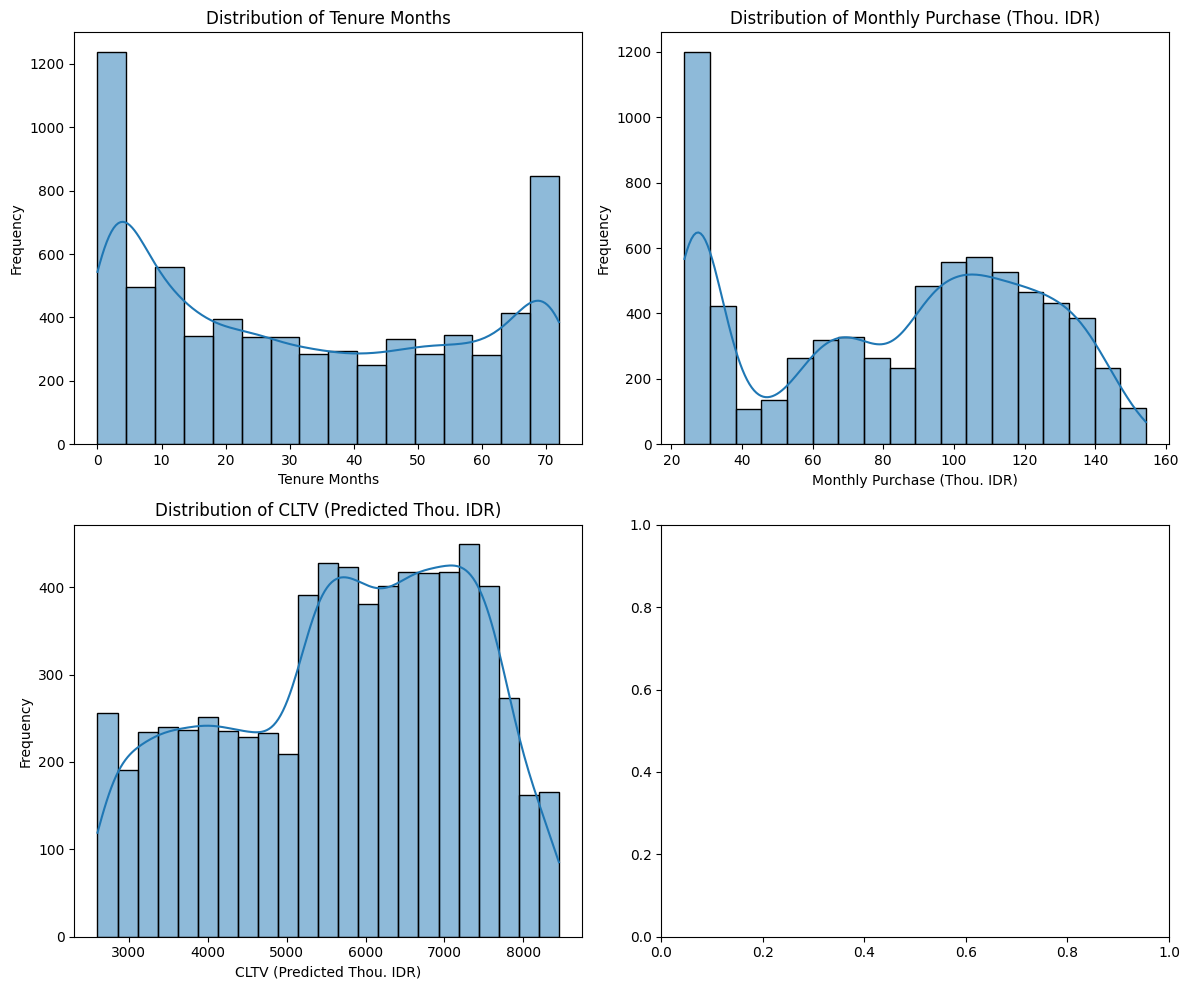

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
plot_numeric_distribution(df, 'Tenure Months', ax[0, 0])
plot_numeric_distribution(df, 'Monthly Purchase (Thou. IDR)', ax[0, 1])
plot_numeric_distribution(df, 'CLTV (Predicted Thou. IDR)', ax[1, 0])

# Remove the empty subplot (if any)
if len(df.columns) % 2 != 0:
    fig.delaxes(ax[-1, -1])

plt.tight_layout()
plt.show()

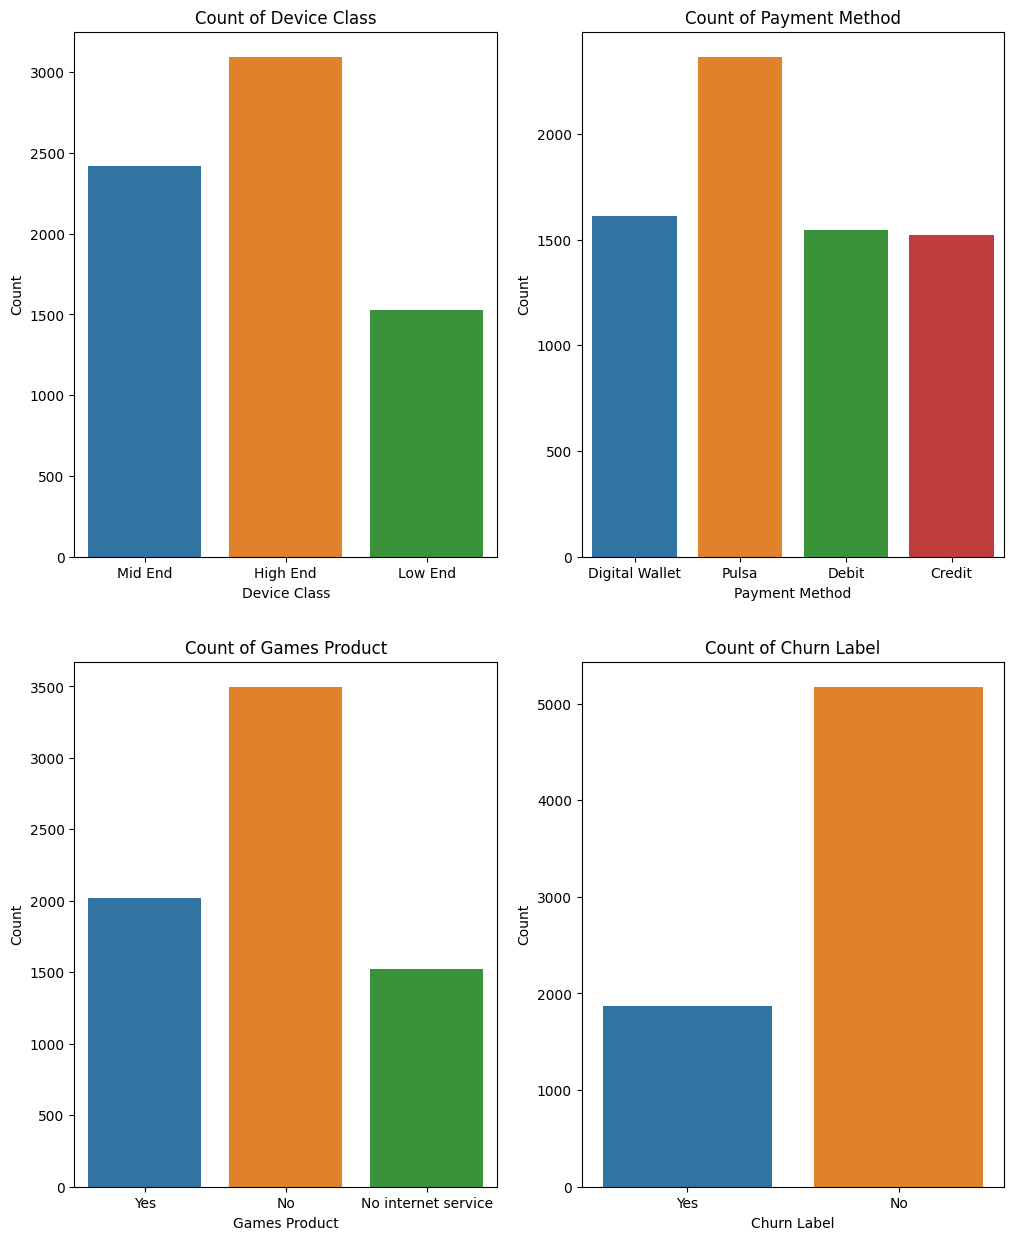

In [16]:
def plot_categorical_distribution(data, column, ax):
    sns.countplot(x=column, data=data, ax=ax)
    ax.set_title(f'Count of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

fig, ax = plt.subplots(2, 2, figsize=(12, 15))  # Adjust the size and layout as needed
plot_categorical_distribution(df, 'Device Class', ax[0, 0])
plot_categorical_distribution(df, 'Payment Method', ax[0, 1])
plot_categorical_distribution(df, 'Games Product', ax[1, 0])
plot_categorical_distribution(df, 'Churn Label', ax[1, 1])

/tmp/ipykernel_450/3091963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


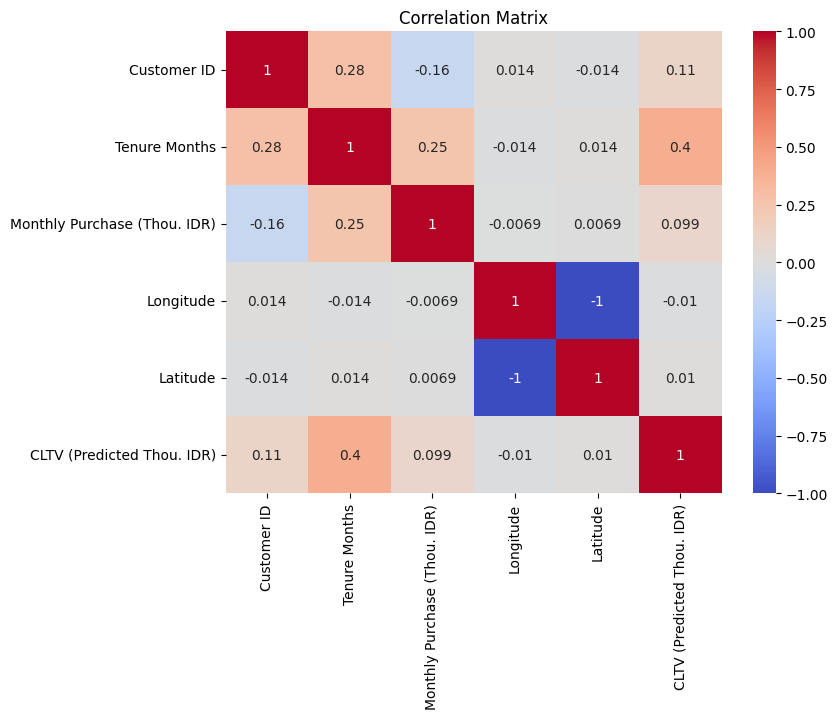

In [18]:
# Visualize correlations
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Foundings
- There is a moderate positive correlation between <b>Tenure Months</b> and <b>CLTV (Predicted Thou. IDR)</b>, suggesting that customers who have been with the company longer tend to have a higher predicted lifetime value.
- <b>Monthly Purchase (Thou. IDR)</b> also has a positive correlation with <b>CLTV (Predicted Thou. IDR)</b>, indicating that customers who spend more monthly are likely to have a higher lifetime value.
- The geographical coordinates (Longitude and Latitude) do not show significant correlations with other variables, which might imply that location within Jakarta is not a strong predictor of customer behavior in this dataset.

In [27]:
# Visualize the distribution of numeric variables segmented by churn
def plot_numeric_distribution_churn(data, column, ax):
    sns.histplot(data=data, x=column, hue='Churn Label', ax=ax)
    ax.set_title(f'Distribution of {column} by Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Visualize the distribution of categorical variables segmented by churn
def plot_categorical_distribution_churn(data, column, ax):
    sns.countplot(x=column, hue='Churn Label', data=data, ax=ax)
    ax.set_title(f'Count of {column} by Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

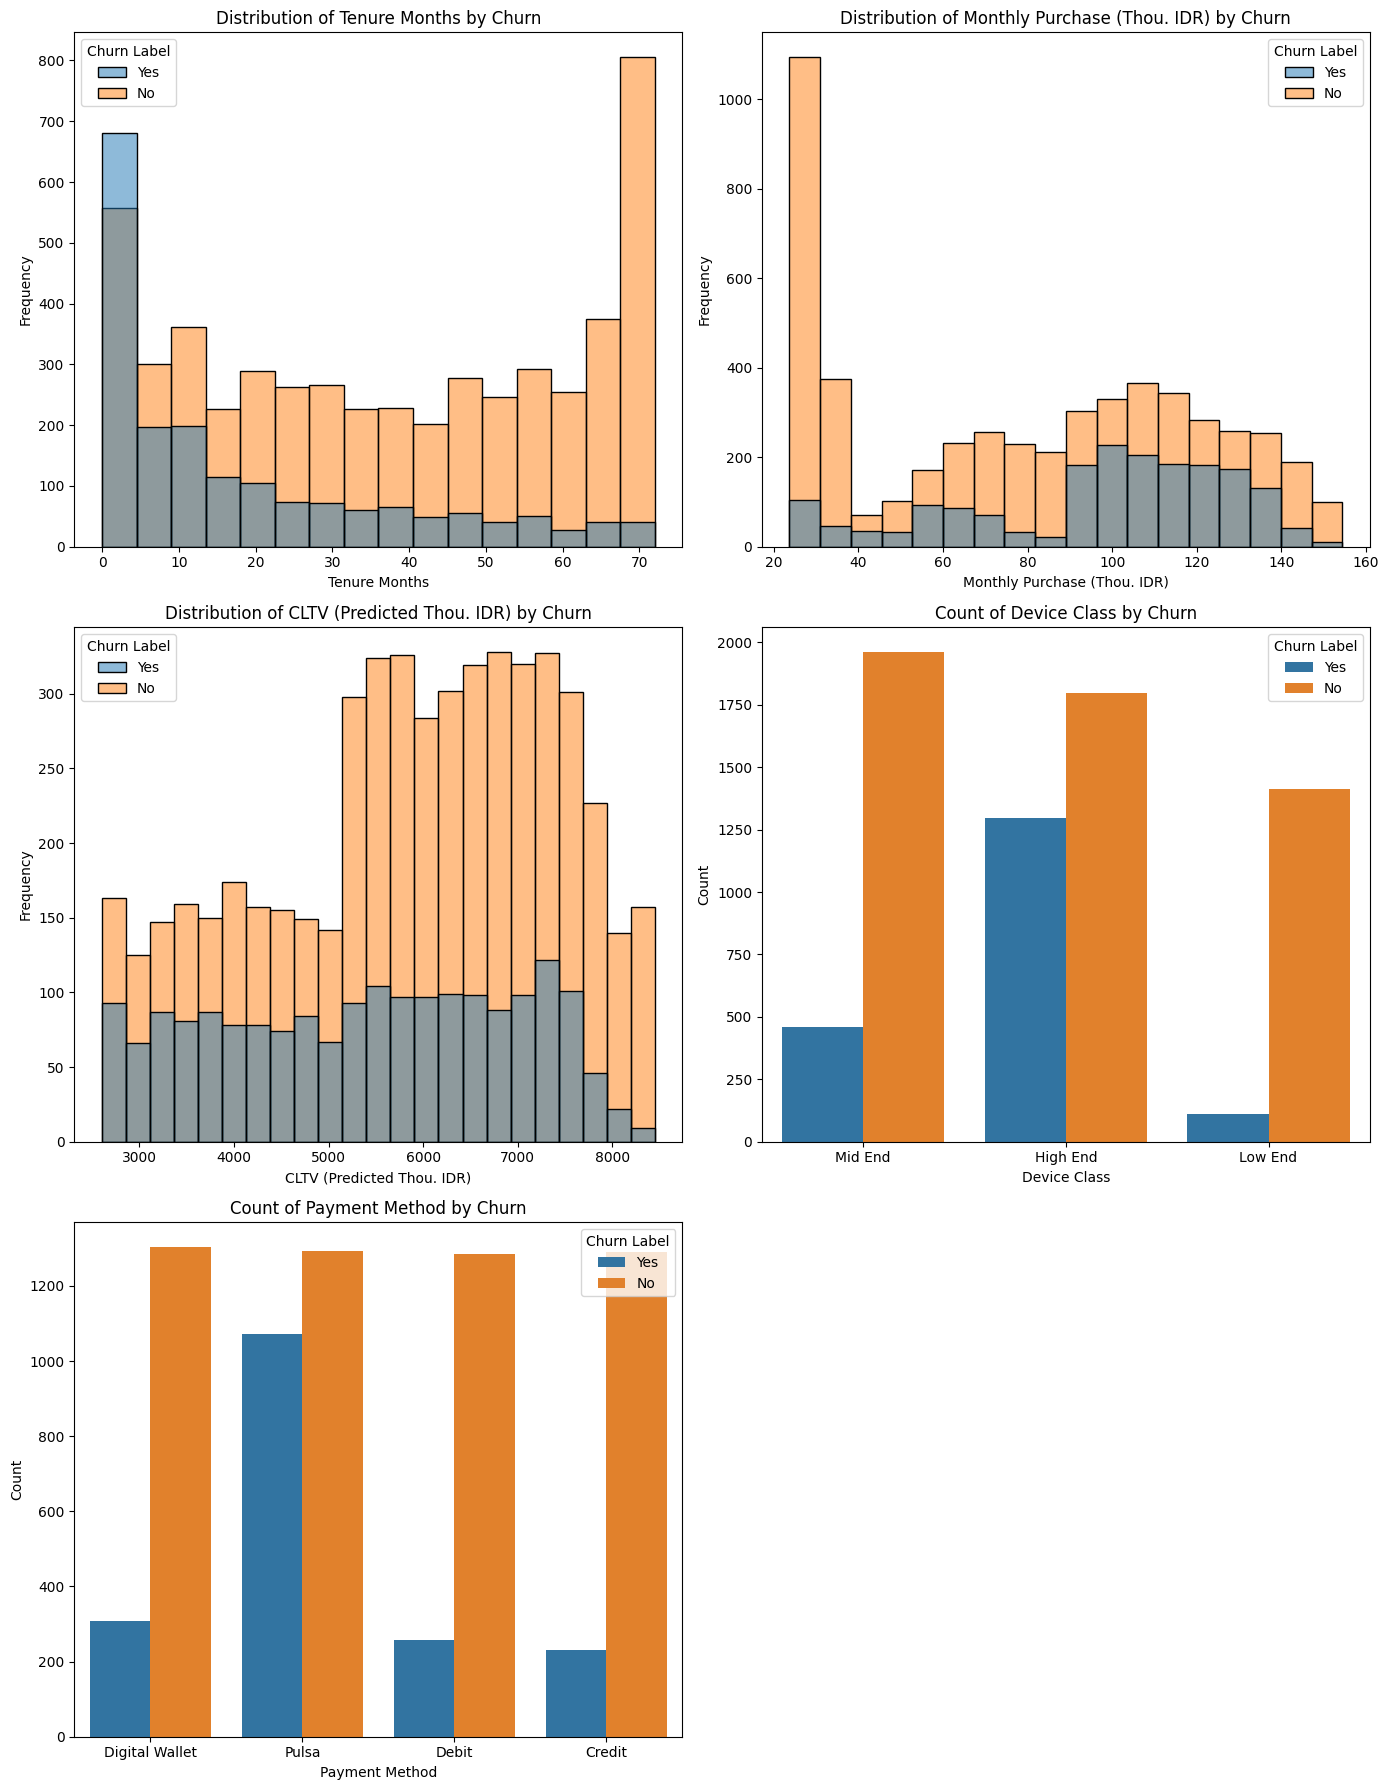

In [28]:
fig, ax = plt.subplots(3, 2, figsize=(14, 18))  # Adjust the size and layout as needed
plot_numeric_distribution_churn(df, 'Tenure Months', ax[0, 0])
plot_numeric_distribution_churn(df, 'Monthly Purchase (Thou. IDR)', ax[0, 1])
plot_numeric_distribution_churn(df, 'CLTV (Predicted Thou. IDR)', ax[1, 0])

# Remove the empty subplot (if any)
fig.delaxes(ax[2,1])

# Visualizing categorical variables - adjust according to your dataset
plot_categorical_distribution_churn(df, 'Device Class', ax[1, 1])
plot_categorical_distribution_churn(df, 'Payment Method', ax[2, 0])

plt.tight_layout()
plt.show()

<Axes: xlabel='Tenure Months', ylabel='Count'>

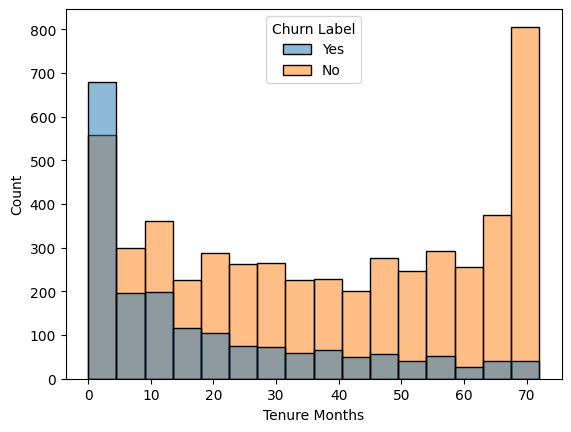

In [26]:
sns.histplot(data=df, x='Tenure Months', hue='Churn Label')

In [ ]:
# Create a pivot table
pivot_table = pd.pivot_table(df, index='Payment Method', columns='Churn Label', aggfunc=len, fill_value=0)

# Display the pivot table
print(pivot_table[['Customer ID']])

               Customer ID      
Churn Label             No   Yes
Payment Method                  
Credit                1290   232
Debit                 1286   258
Digital Wallet        1304   308
Pulsa                 1294  1071


In [ ]:
df[['Churn Label', 'Device Class', 'Payment Method', 'Customer ID']].groupby(['Churn Label', 'Device Class', 'Payment Method']).count()

Customer ID
Churn Label Device Class Payment Method             
No          High End     Credit                  446
                         Debit                   459
                         Digital Wallet          148
                         Pulsa                   746
            Low End      Credit                  322
                         Debit                   314
                         Digital Wallet          670
                         Pulsa                   107
            Mid End      Credit                  522
                         Debit                   513
                         Digital Wallet          486
                         Pulsa                   441
Yes         High End     Credit                  151
                         Debit                   187
                         Digital Wallet          110
                         Pulsa                   849
            Low End      Credit                    9
                         Debit                    18
                         Digital Wallet           71
                         Pulsa                    15
            Mid End      Credit                   72
                         Debit                    53
                         Digital Wallet          127
                         Pulsa                   207

In [ ]:
df[['Device Class', 'Payment Method', 'Customer ID']].groupby(['Device Class', 'Payment Method']).count()

Customer ID
Device Class Payment Method             
High End     Credit                  597
             Debit                   646
             Digital Wallet          258
             Pulsa                  1595
Low End      Credit                  331
             Debit                   332
             Digital Wallet          741
             Pulsa                   122
Mid End      Credit                  594
             Debit                   566
             Digital Wallet          613
             Pulsa                   648

In [ ]:
df[['Location', 'Churn Label']].value_counts(['Location', 'Churn Label'])

Location  Churn Label
Jakarta   No             3708
Bandung   No             1466
Jakarta   Yes            1323
Bandung   Yes             546
dtype: int64

In [ ]:
df[['Use MyApp', 'Churn Label']].value_counts(['Use MyApp', 'Churn Label'])

Use MyApp            Churn Label
Yes                  No             1914
No                   No             1847
No internet service  No             1413
No                   Yes             938
Yes                  Yes             818
No internet service  Yes             113
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [ ]:
df['Churn Label'] = df['Churn Label'].replace({'Yes' : 1, 'No': 0})
df['Games Product'] = df['Games Product'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Music Product'] = df['Music Product'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Education Product'] = df['Education Product'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Video Product'] = df['Video Product'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Use MyApp'] = df['Use MyApp'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Call Center'] = df['Call Center'].replace({'Yes' : 1, 'No': 0})

In [ ]:
df['Use MyApp'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<ipython-input-61-b1f3e8514708>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr('pearson'))


<Axes: >

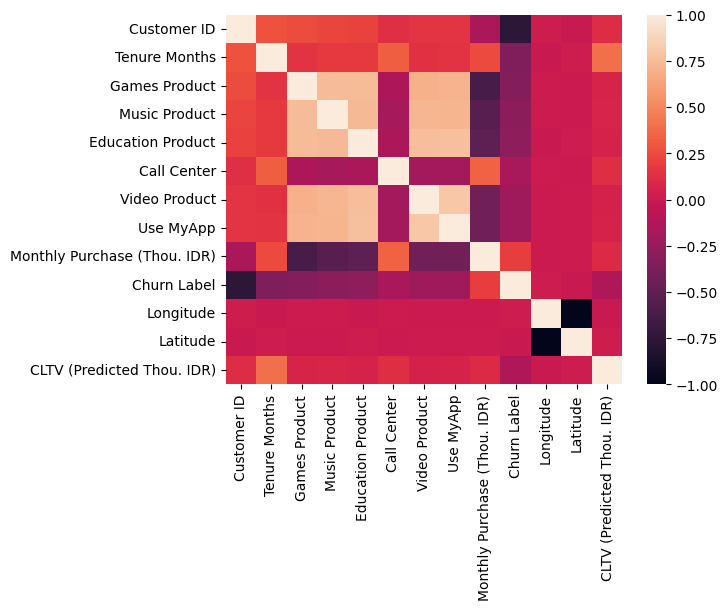

In [ ]:
sns.heatmap(data=df.corr('pearson'))

<Axes: xlabel='CLTV (Predicted Thou. IDR)', ylabel='Count'>

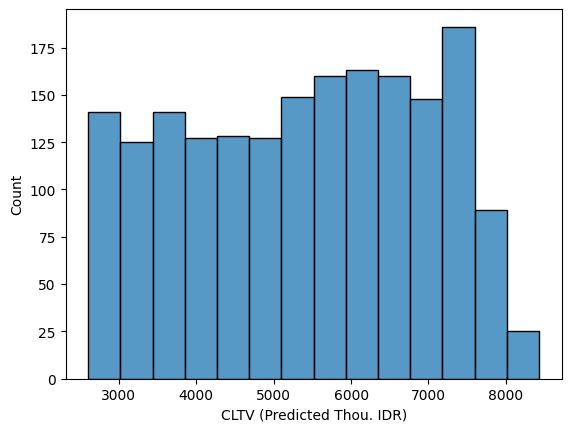

In [ ]:
sns.histplot(data=df[df['Churn Label'] == 1], x='CLTV (Predicted Thou. IDR)')

<Axes: xlabel='CLTV (Predicted Thou. IDR)', ylabel='Count'>

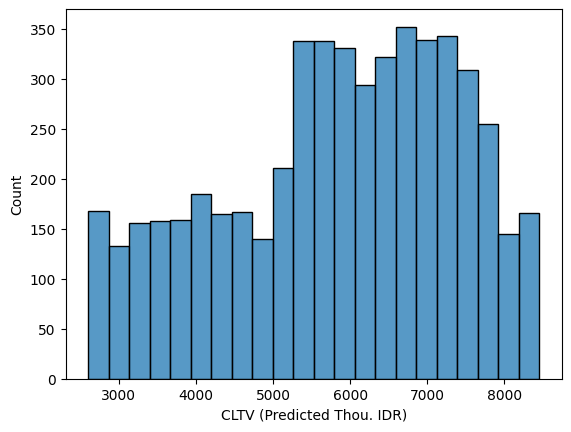

In [ ]:
sns.histplot(data=df[df['Churn Label'] == 0], x='CLTV (Predicted Thou. IDR)')

<Axes: xlabel='Tenure Months', ylabel='CLTV (Predicted Thou. IDR)'>

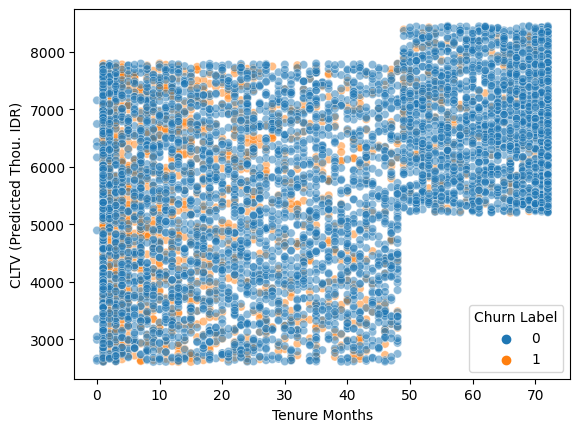

In [ ]:
sns.scatterplot(data=df, x='Tenure Months', y='CLTV (Predicted Thou. IDR)', hue='Churn Label', alpha=0.5)

<Axes: xlabel='Tenure Months', ylabel='CLTV (Predicted Thou. IDR)'>

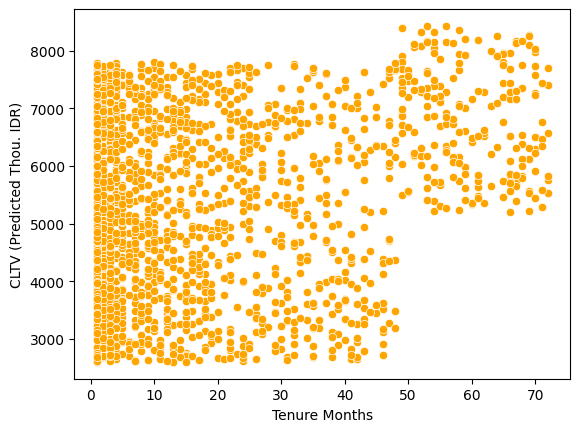

In [ ]:
sns.scatterplot(data=df[df['Churn Label'] == 1], x='Tenure Months', y='CLTV (Predicted Thou. IDR)', color='Orange')

<Axes: xlabel='Tenure Months', ylabel='CLTV (Predicted Thou. IDR)'>

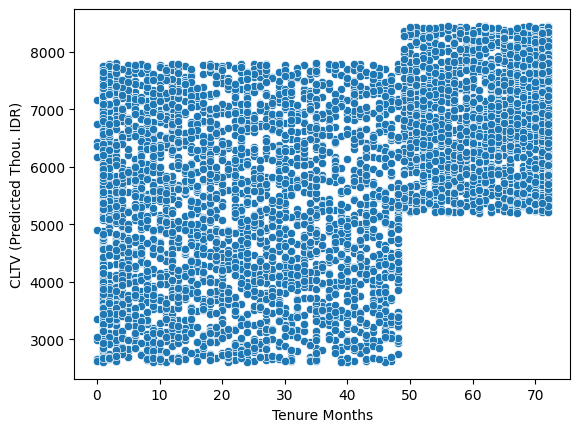

In [ ]:
sns.scatterplot(data=df[df['Churn Label'] == 0], x='Tenure Months', y='CLTV (Predicted Thou. IDR)')

<Axes: xlabel='Monthly Purchase (Thou. IDR)', ylabel='Count'>

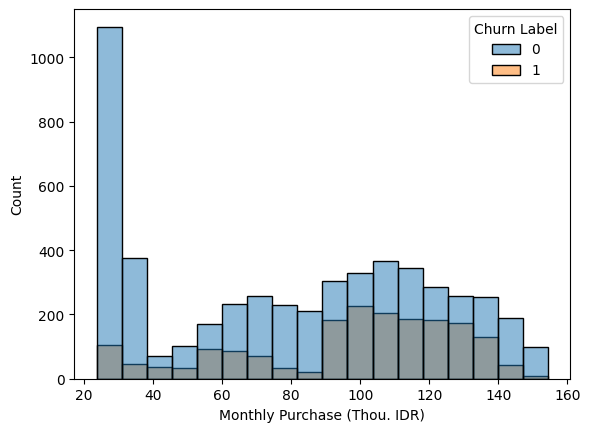

In [ ]:
sns.histplot(data=df, x='Monthly Purchase (Thou. IDR)', hue='Churn Label')

<p> Berdasarkan Data diatas konsumen dengan Monthly Purchase rendah (20k - 40k) cenderung memiliki label Churn = 0, sedangkan customer dengan churn label 1 memiuliki kecenderungan spent disekitar angka 100k </p>

<Axes: xlabel='Tenure Months', ylabel='Count'>

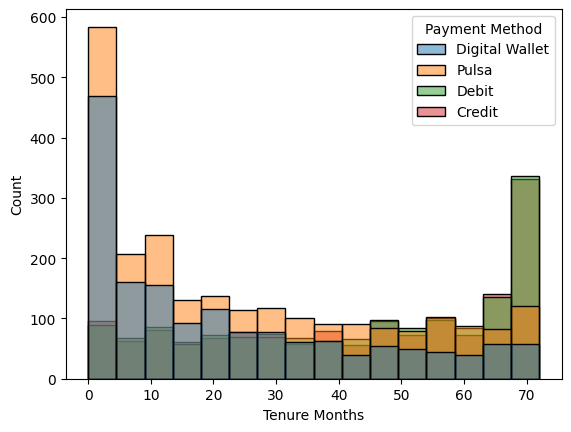

In [ ]:
sns.histplot(data=df, x='Tenure Months', hue='Payment Method')

In [ ]:
def grouping_tenure_months(x) :
  if x > 50 :
    return 2
  elif x > 30 :
    return 1
  else:
    return 0

df['Tenure Months Groups'] = df['Tenure Months'].apply(grouping_tenure_months)

In [ ]:
def group_values(series):
    bins = [0, 40, 80, 120, 160]
    labels = ['0-40', '40-80', '80-120', '120-160']

    grouped_series = pd.cut(series, bins=bins, labels=labels, right=False, include_lowest=True)

    return grouped_series

df['monthly_purchase_grouped'] = group_values(df['Monthly Purchase (Thou. IDR)'])

<Axes: xlabel='monthly_purchase_grouped', ylabel='count'>

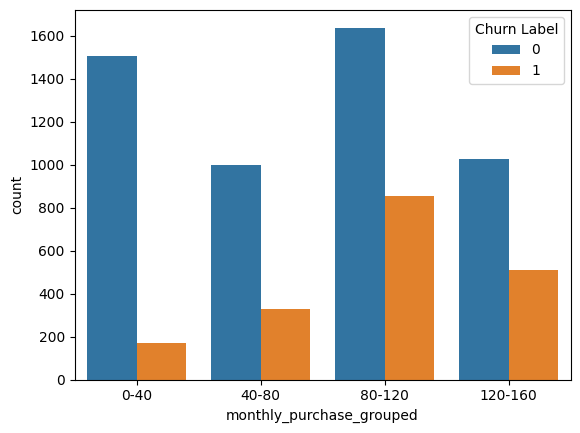

In [ ]:
sns.countplot(data=df, x='monthly_purchase_grouped', hue='Churn Label')

<p> Apply <b>Preprocessing</b> for Monthly Purchase column (Grouping Values) </p>

Given the data's nature and the problem at hand (classification for predicting churn), here are some insights and suggestions for model selection and data preprocessing:

Data Preprocessing:

Customer ID: It's likely a unique identifier for each customer, and typically, it won't have predictive power. You can exclude it from your feature set.
Location, Device Class, Games Product, and other categorical columns: Convert these categorical features to numerical representations using techniques like one-hot encoding or label encoding.
Longitude and Latitude: Depending on the distribution of customers, these could be directly fed into the model, or you could derive new features such as clusters based on geographic density (using techniques like KMeans clustering).
Churn Label: Ensure this target column is encoded as binary (e.g., 0 for not churned and 1 for churned).
Model Selection:

Logistic Regression: This is a good starting point. Given the number of samples and features, it will be computationally efficient and provide a baseline performance.
Random Forest: Tree-based methods, especially ensemble ones like Random Forest, can handle a mix of numerical and categorical features well and are less prone to overfitting.
Gradient Boosted Trees (e.g., XGBoost, LightGBM): These are powerful classifiers that often perform well for such classification tasks. However, they have more hyperparameters to tune.
Support Vector Machines (SVM): They can be efficient for mid-sized datasets. You might want to experiment with different kernels.
Neural Networks: Given the data size, a simple feed-forward neural network might be effective. However, deep learning models could easily overfit with this size of data, so if you go this route, ensure you use techniques like dropout and early stopping.
Feature Importance:

Once you've trained a model, especially tree-based ones, you can evaluate feature importances to understand which features are most predictive of churn. This can provide valuable business insights.
Model Evaluation:

Make sure to split the data into training and validation/test sets.
Use metrics like accuracy, precision, recall, F1-score, and ROC-AUC to evaluate model performance, especially considering the business impact of false positives vs. false negatives in predicting churn.
Other Considerations:

Consider techniques like SMOTE if there's a class imbalance in the churn labels.
Feature engineering, such as creating interaction terms, polynomial features, or aggregations, might help improve model performance.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

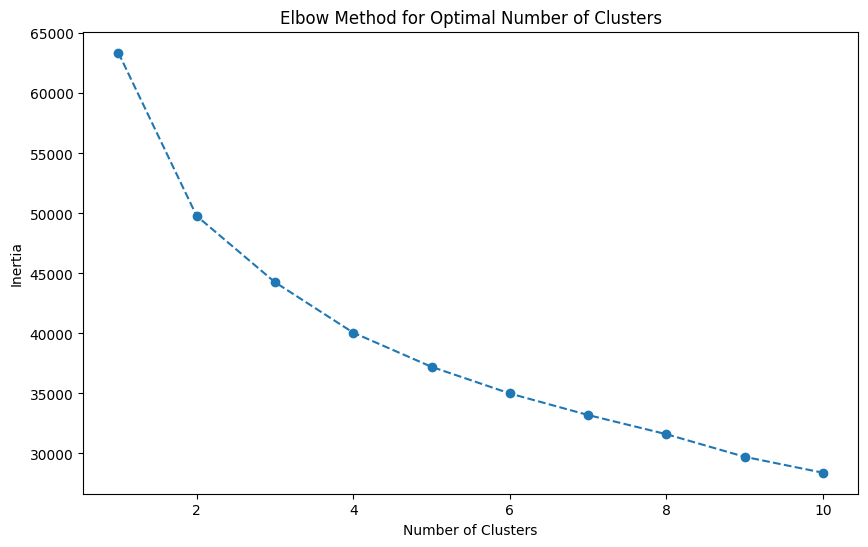

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Copy the data to avoid changes to the original dataframe
segmentation_data = df.copy()

# Encoding categorical variables with LabelEncoder
binary_features = ['Games Product', 'Music Product', 'Education Product', 'Video Product', 'Use MyApp', 'Call Center']
label_encoder = LabelEncoder()
for col in binary_features:
    segmentation_data[col] = label_encoder.fit_transform(segmentation_data[col])

# Selecting relevant features for clustering
features_for_clustering = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'] + binary_features

# Scaling the data
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data[features_for_clustering])

# Finding the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
# Choose the number of clusters (k) based on the Elbow plot, and fit the final K-means model
k = 3
kmeans_final = KMeans(n_clusters=k, random_state=42)
kmeans_final.fit(segmentation_data_scaled)

# Assign the cluster labels to the original dataframe
df['Segment'] = kmeans_final.labels_

# Now you can analyze the segments
# For example, calculate average values for each segment:
segmentation_analysis = df.groupby('Segment').mean()

segmentation_analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_450/493563800.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segmentation_analysis = df.groupby('Segment').mean()


,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
Segment,,,,,,
0,2711.962393,14.123077,88.978944,107.045796,-6.406482,5126.620556
1,4108.224641,32.206160,46.426337,107.045000,-6.405764,5740.214867
2,3725.257496,51.375661,119.793968,107.038732,-6.400116,6311.707496


In [37]:
def churn_bin_encoding(x) :
    if x == 'Yes':
        return 1
    else :
        return 0

df['churn_bin_encoded'] = df['Churn Label'].apply(churn_bin_encoding)
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Segment,churn_bin_encoded
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7,1,1
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3,0,1
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6,2,1
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9,2,1
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0,2,1


In [39]:
df.groupby('Segment').mean()['churn_bin_encoded']

/tmp/ipykernel_450/3774933416.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Segment').mean()['churn_bin_encoded']


Segment
0    0.490598
1    0.103901
2    0.206349
Name: churn_bin_encoded, dtype: float64

#### Suggested next Action :
For segments with low tenure, consider strategies to boost early engagement.
For segments with high spending but also high churn, look into customer satisfaction and service quality issues.